# Predicting house prices with Deep Learning (keras)

A common type of machine-learning problem is regression, which consists of predicting a continuous
value instead of a discrete label: for instance, predicting the temperature tomorrow,
given meteorological data; or predicting the time that a software project will take to
complete, given its specifications.

In the next example we will predict the house price base on different parameters.

1st example:
 *

In [1]:
# Predicting house prices
# - regression example
# Dataset: Boston suburb in the mid-1970 with 13 features

# Deep learning library

from keras.datasets import boston_housing
from keras import models
from keras import layers

# Python libraries

from io import StringIO
import requests
import json
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [54]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu',
                           input_shape = (train_data.shape[1], )))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mae'])
    return model

def build_a_model(units):
    model = models.Sequential()
    model.add(layers.Dense(units, activation = 'relu',
                           input_shape = (train_data.shape[1], )))
    model.add(layers.Dense(units, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mae'])
    return model

def kagglemodel(units, dataset):
    kmodel = models.Sequential()
    kmodel.add(layers.Dense(units, activation = 'relu',
                           input_shape = (dataset.shape[1], )))
    kmodel.add(layers.Dense(units, activation = 'relu'))
    kmodel.add(layers.Dense(1))
    kmodel.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mae'])
    return kmodel

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [4]:
# Train targets: median values of owner-occupied homes (thousands of dollars)

print("Train data shape: " + str(train_data.shape))
print("\nTest data shape: " + str(test_data.shape))
print("\nTrain targets: " + str(train_targets[0:16]))

Train data shape: (404, 13)

Test data shape: (102, 13)

Train targets: [ 15.2  42.3  50.   21.1  17.7  18.5  11.3  15.6  15.6  14.4  12.1  17.9
  23.1  19.9  15.7   8.8]


In [5]:
mean = train_data.mean(axis = 0)
train_data -= mean

std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [6]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('\nProcessing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1) * num_val_samples:]],
         axis = 0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i+1) * num_val_samples:]],
         axis = 0)    
    
    model01 = build_model()
    model01.fit(partial_train_data, partial_train_targets,
              epochs = num_epochs, batch_size = 1, verbose = 0)
    
    val_mse, val_mae = model01.evaluate(val_data, val_targets)
    all_scores.append(val_mae)


Processing fold # 0
 32/101 [========>.....................] - ETA: 0s
Processing fold # 1
 32/101 [========>.....................] - ETA: 0s
Processing fold # 2
 32/101 [========>.....................] - ETA: 0s
Processing fold # 3
 32/101 [========>.....................] - ETA: 0s

In [7]:
print("Scores: " + str(all_scores))

Scores: [2.0914647520178615, 2.1278460804778749, 2.9342347938235442, 2.4138715585859694]


In [8]:
print("Mean score: " + str(np.mean(all_scores)))

Mean score: 2.39185429623


In [9]:
from keras import backend as D

D.clear_session()

In [10]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print("\nProcessing fold # ", i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1) * num_val_samples:]],
         axis = 0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i+1) * num_val_samples:]],
         axis = 0)  
    
    model02 = build_model()
    history = model02.fit(partial_train_data, partial_train_targets,
              validation_data = (val_data, val_targets),
              epochs = num_epochs, batch_size = 1, verbose = 0)
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)


Processing fold #  0

Processing fold #  1

Processing fold #  2

Processing fold #  3


In [11]:
 average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [13]:
def smooth_curve(points, factor = 0.9):
    
    smoothed_points = []
    
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else: 
            smoothed_points.append(point)
    
    return smoothed_points

In [14]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

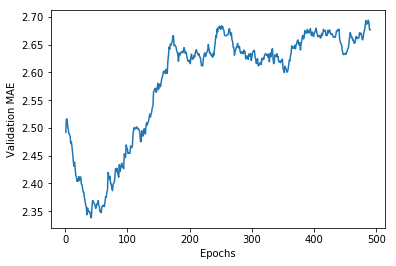

In [15]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [16]:
num_epochs03 = 80
batch = 16
all_mae_histories03 = []

for i in range(k):
    print("\nProcessing fold # ", i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1) * num_val_samples:]],
         axis = 0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i+1) * num_val_samples:]],
         axis = 0)  
    
    model03 = build_a_model(64)
    history = model03.fit(partial_train_data, partial_train_targets,
              validation_data = (val_data, val_targets),
              epochs = num_epochs03, batch_size = batch, verbose = 0)
    
    mae_history03 = history.history['val_mean_absolute_error']
    all_mae_histories03.append(mae_history03)


Processing fold #  0

Processing fold #  1

Processing fold #  2

Processing fold #  3


In [17]:
average_mae_history03 = [np.mean([x[i] for x in all_mae_histories03]) for i in range(num_epochs03)]

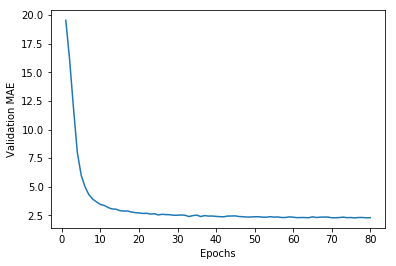

In [18]:
plt.plot(range(1, len(average_mae_history03) + 1), average_mae_history03)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [19]:
smooth_mae_history03 = smooth_curve(average_mae_history03[10:])

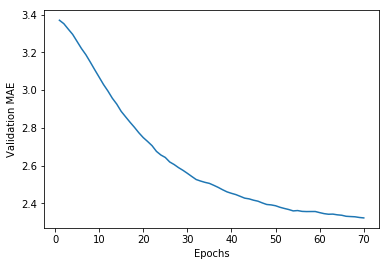

In [20]:
plt.plot(range(1, len(smooth_mae_history03) + 1), smooth_mae_history03)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [21]:
test_mse_score, test_mae_score = model03.evaluate(test_data, test_targets)

 32/102 [========>.....................] - ETA: 0s

In [22]:
print ("Mean absolute error score: " + str(test_mae_score * 1000) + " dls.")

Mean absolute error score: 2724.52795739 dls.


In [23]:
predictions = model03.predict(test_data)

In [24]:
print("Prediction: " + str(predictions[7]))
print("Target: " + str(test_targets[7]))

Prediction: [ 21.19046402]
Target: 22.9


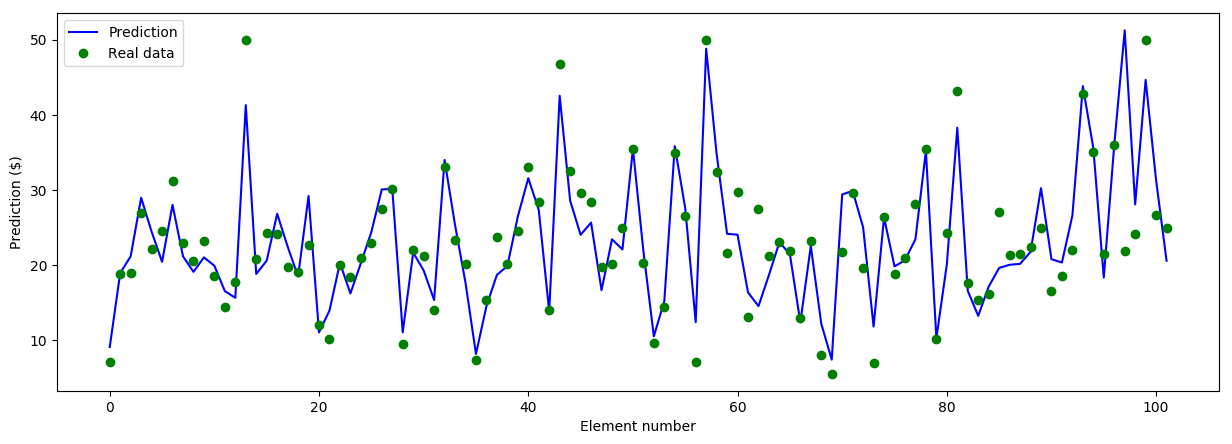

In [25]:
fig = plt.figure(figsize=(15, 5), dpi = 100)
plt.plot(predictions, 'b', label = 'Prediction')
plt.plot(test_targets, 'go', label = 'Real data')
plt.xlabel('Element number')
plt.ylabel('Prediction ($)')
plt.legend()

plt.show()

In [297]:
# The code was removed by DSX for sharing.

In [298]:
#This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

 #id a notation for a house
 #date Date house was sold
 #price Price is prediction target
 #bedrooms Number of Bedrooms/House
 #bathrooms Number of bathrooms/bedrooms
 #sqft_living square footage of the home
 #sqft_lot square footage of the lot
 #floors Total floors (levels) in house
 #waterfront House which has a view to a waterfront
 #view Has been viewed
 #condition How good the condition is ( Overall )
 #grade overall grade given to the housing unit, based on King County grading system
 #sqft_above square footage of house apart from basement
 #sqft_basement square footage of the basement
 #yr_built Built Year
 #yr_renovated Year when house was renovated
 #zipcode zip
 #lat Latitude coordinate
 #long Longitude coordinate
 #sqft_living15 Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
 #sqft_lot15 lotSize area in 2015(implies-- some renovations)

In [299]:
pd_kaggle.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [300]:
pd_kaggledata = pd_kaggle[['bedrooms', 
           'bathrooms', 
           'sqft_living', 
           'sqft_lot',
           'floors', 
           'waterfront', 
           'view',            
           'condition',
           'grade', 
           'sqft_above', 
           'sqft_basement', 
           'yr_built', 
           'yr_renovated', 
           'zipcode',
           'lat',
           'long',
           'sqft_living15', 
           'sqft_lot15']]

pd_kaggletarget = pd_kaggle[['price']]

In [301]:
pd_kaggledata.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [302]:
pd_kaggletarget.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [303]:
pd_kaggletarget /= 1000

In [304]:
pd_kaggletarget.head()

,price
0,221.9
1,538.0
2,180.0
3,604.0
4,510.0


In [305]:
print("Kaggle data shape: " + str(pd_kaggledata.shape))
print("Kaggle target shape: " + str(pd_kaggletarget.shape))

Kaggle data shape: (21613, 18)
Kaggle target shape: (21613, 1)


In [306]:
# The total rows are len(pd_houses) from this total, we take some part as training dataset and the remaining will be our test dataset

print("Data(total rows): " + str(len(pd_kaggledata)))
print("Training set(75%): " + str(len(pd_kaggledata) * 0.75))
print("Test set(25%): " + str(len(pd_kaggledata) * 0.25))

print("\n========================================================================================")

print("\nData(total rows): " + str(len(pd_kaggletarget)))
print("Training set(75%): " + str(len(pd_kaggletarget) * 0.75))
print("Test set(25%): " + str(len(pd_kaggletarget) * 0.25))

Data(total rows): 21613
Training set(75%): 16209.75
Test set(25%): 5403.25


Data(total rows): 21613
Training set(75%): 16209.75
Test set(25%): 5403.25


In [307]:
# ************************************************
# Kaggle data

train_kaggledata = pd_kaggledata[:16209]
test_kaggledata = pd_kaggledata[16210:]

# ************************************************
# Kaggle target

train_kaggletarget = pd_kaggletarget[:16209]
test_kaggletarget = pd_kaggletarget[16210:]

In [308]:
train_kaggledata = train_kaggledata.values
test_kaggledata = test_kaggledata.values

train_kaggletarget = train_kaggletarget.values
test_kaggletarget = test_kaggletarget.values

In [309]:
train_kaggletarget_ = []
test_kaggletarget_ = []

for i in train_kaggletarget:
    train_kaggletarget_.append(int(i))

for j in test_kaggletarget:
    test_kaggletarget_.append(int(j))

train_kaggletarget = np.asarray(train_kaggletarget_)
test_kaggletarget = np.asarray(test_kaggletarget_)

# Preparing the data

It would be problematic to feed into a neural network values that all take wildly different
ranges. The network might be able to automatically adapt to such heterogeneous
data, but it would definitely make learning more difficult. A widespread best practice
to deal with such data is to do feature-wise normalization: for each feature in the input
data (a column in the input data matrix), you subtract the mean of the feature and
divide by the standard deviation, so that the feature is centered around 0 and has a
unit standard deviation.

In [310]:
# Get the mean and the std

mean_kaggledata = train_kaggledata.mean(axis = 0)
std_kaggledata = train_kaggledata.std(axis = 0)

# Normalize the train and the dataset

train_kaggledata -= mean_kaggledata
train_kaggledata /= std_kaggledata

test_kaggledata -= mean_kaggledata
test_kaggledata /= std_kaggledata

In [311]:
train_kaggledata

array([[-0.39008177, -1.39975135, -0.96585918, ..., -0.29979538,
        -0.94411808, -0.27849795],
       [-0.39008177,  0.24845648,  0.57125246, ..., -0.74608253,
        -0.42329578, -0.20671489],
       [-1.45596771, -1.39975135, -1.41925182, ..., -0.12703906,
         1.10940983, -0.19144881],
       ..., 
       [ 0.67580417, -0.41082666,  0.68183603, ..., -1.26435148,
        -0.2298475 , -0.25684393],
       [ 0.67580417, -0.08118509,  0.77030289, ..., -1.09879334,
        -1.01852126, -0.41874379],
       [ 0.67580417,  0.57809804,  0.57125246, ..., -1.12758606,
         0.21657161, -0.17307898]])

In [312]:
test_kaggledata

array([[-0.39008177,  0.24845648, -0.39082461, ...,  0.18968085,
         0.30585543, -0.15903996],
       [ 0.67580417,  1.23738117, -0.57881668, ...,  0.49920259,
        -0.06616049, -0.23248317],
       [-0.39008177, -1.39975135, -0.87739232, ...,  0.19687903,
        -1.316134  , -0.18874205],
       ..., 
       [-1.45596771, -1.72939292, -1.14279289, ..., -0.60211893,
        -1.42029846, -0.40997391],
       [-0.39008177,  0.57809804, -0.50140818, ...,  1.05346244,
        -0.83995362, -0.43595873],
       [-1.45596771, -1.72939292, -1.14279289, ..., -0.60211893,
        -1.42029846, -0.43343243]])

In [313]:
model_kaggle = kagglemodel(64, train_kaggledata)

In [314]:
kaggledata_val = train_kaggledata[:1600]
kaggledata_train = train_kaggledata[1600:]

kaggletarget_val = train_kaggletarget[:1600]
kaggletarget_train = train_kaggletarget[1600:]

In [468]:
epochs_kaggle = 80
batch_kaggle = 128

history_kaggle = model_kaggle.fit(kaggledata_train, 
                                 kaggletarget_train, 
                                 epochs = epochs_kaggle, 
                                 batch_size = batch_kaggle, 
                                 validation_data = (kaggledata_val, kaggletarget_val),
                                 verbose = 0)

In [469]:
val_mae_kaggle = history_kaggle.history['val_mean_absolute_error']
mae_kaggle = history_kaggle.history['mean_absolute_error']

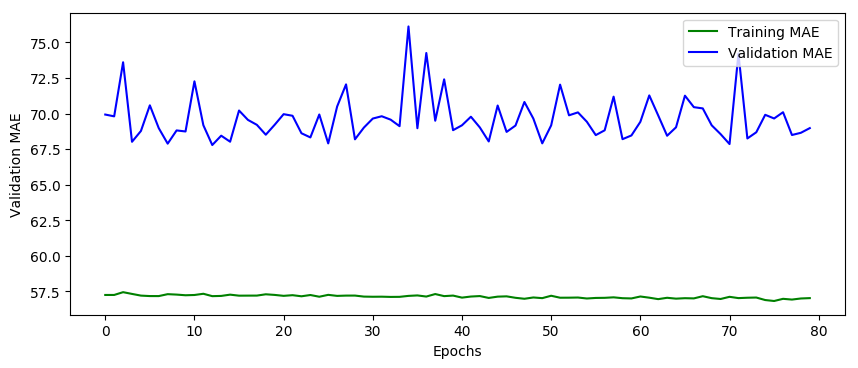

In [470]:
fig = plt.figure(figsize=(10, 4), dpi = 100)
plt.plot(mae_kaggle, 'g', label = 'Training MAE')
plt.plot(val_mae_kaggle, 'b', label = 'Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

In [471]:
smooth_mae_kaggle = smooth_curve(mae_kaggle)

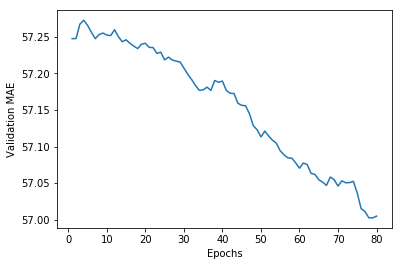

In [472]:
plt.plot(range(1, len(smooth_mae_kaggle) + 1), smooth_mae_kaggle)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [473]:
print("Mean MAE(train): " + str(np.mean(mae_kaggle)))

Mean MAE(train): 57.127789798


In [474]:
test_mse_kaggle, test_mae_kaggle = model_kaggle.evaluate(test_kaggledata,test_kaggletarget)

5184/5403 [===========================>..] - ETA: 0s

In [475]:
print("Test MSE score: " + str(test_mse_kaggle))
print("Test MAE score: " + str(test_mae_kaggle))

Test MSE score: 16210.7166252
Test MAE score: 73.43624322


In [476]:
kaggle_predictions = model_kaggle.predict(test_kaggledata)

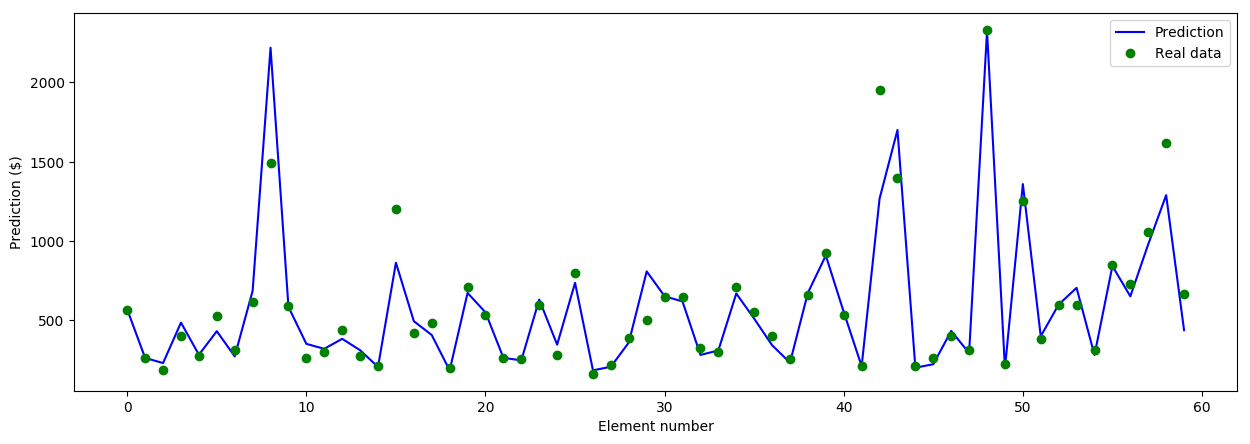

In [482]:
fig = plt.figure(figsize=(15, 5), dpi = 100)
plt.plot(kaggle_predictions[:60], 'b', label = 'Prediction')
plt.plot(test_kaggletarget[:60], 'go', label = 'Real data')
plt.xlabel('Element number')
plt.ylabel('Prediction ($)')
plt.legend()

plt.show()